## Feed Forward Network ( 1-Layer)

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
np.random.seed(1671)  # for reproducibility

In [3]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [4]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalize 
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [7]:
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 0s - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 0s - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 0s - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/200
48000/48000 [==============================] - 0s - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/200
48000/48000 [==============================] - 0s - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/200
48000/48000 [==============================] - 1s - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - val_acc: 0.8882
Epoch 8/200
48000/48000 [=============================

48000/48000 [==============================] - 0s - loss: 0.2881 - acc: 0.9194 - val_loss: 0.2832 - val_acc: 0.9212
Epoch 128/200
48000/48000 [==============================] - 0s - loss: 0.2879 - acc: 0.9194 - val_loss: 0.2830 - val_acc: 0.9210
Epoch 129/200
48000/48000 [==============================] - 0s - loss: 0.2876 - acc: 0.9196 - val_loss: 0.2828 - val_acc: 0.9217
Epoch 130/200
48000/48000 [==============================] - 0s - loss: 0.2874 - acc: 0.9197 - val_loss: 0.2826 - val_acc: 0.9216
Epoch 131/200
48000/48000 [==============================] - 0s - loss: 0.2871 - acc: 0.9200 - val_loss: 0.2827 - val_acc: 0.9211
Epoch 132/200
48000/48000 [==============================] - 0s - loss: 0.2870 - acc: 0.9197 - val_loss: 0.2824 - val_acc: 0.9213
Epoch 133/200
48000/48000 [==============================] - 0s - loss: 0.2868 - acc: 0.9198 - val_loss: 0.2823 - val_acc: 0.9216
Epoch 134/200
48000/48000 [==============================] - 1s - loss: 0.2866 - acc: 0.9199 - val_loss:

## Add Hidden Layer

In [13]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [14]:
np.random.seed(1671) # for reproducibility

In [15]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [16]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [20]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [21]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()

In [22]:
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))

In [23]:
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))

In [24]:
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])

In [27]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s - loss: 1.4829 - acc: 0.6229 - val_loss: 0.7584 - val_acc: 0.8286
Epoch 2/20
48000/48000 [==============================] - 1s - loss: 0.6050 - acc: 0.8462 - val_loss: 0.4550 - val_acc: 0.8851
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.4398 - acc: 0.8802 - val_loss: 0.3709 - val_acc: 0.9020
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 0.3767 - acc: 0.8953 - val_loss: 0.3321 - val_acc: 0.9083
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.3415 - acc: 0.9026 - val_loss: 0.3055 - val_acc: 0.9147
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 0.3175 - acc: 0.9086 - val_loss: 0.2880 - val_acc: 0.9183
Epoch 7/20
48000/48000 [==============================] - 2s - loss: 0.2989 - acc: 0.9136 - val_loss: 0.2727 - val_acc: 0.9224
Epoch 8/20
48000/48000 [==============================] - 3s 

## Add dropout

In [28]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

In [29]:
# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [30]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

In [31]:
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [32]:
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [33]:
# M_HIDDEN hidden layers 10 outputs
model = Sequential()

In [34]:
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

In [35]:
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

In [36]:
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
__________

In [38]:
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])

In [39]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 2s - loss: 1.7403 - acc: 0.4539 - val_loss: 0.9291 - val_acc: 0.8123
Epoch 2/250
48000/48000 [==============================] - 2s - loss: 0.9231 - acc: 0.7232 - val_loss: 0.5400 - val_acc: 0.8653
Epoch 3/250
48000/48000 [==============================] - 2s - loss: 0.6935 - acc: 0.7882 - val_loss: 0.4297 - val_acc: 0.8884
Epoch 4/250
48000/48000 [==============================] - 2s - loss: 0.5947 - acc: 0.8209 - val_loss: 0.3790 - val_acc: 0.8979
Epoch 5/250
48000/48000 [==============================] - 2s - loss: 0.5347 - acc: 0.8394 - val_loss: 0.3455 - val_acc: 0.9037
Epoch 6/250
48000/48000 [==============================] - 2s - loss: 0.4976 - acc: 0.8525 - val_loss: 0.3231 - val_acc: 0.9107
Epoch 7/250
48000/48000 [==============================] - 2s - loss: 0.4616 - acc: 0.8629 - val_loss: 0.3048 - val_acc: 0.9130
Epoch 8/250
48000/48000 [=============================

48000/48000 [==============================] - 2s - loss: 0.1033 - acc: 0.9685 - val_loss: 0.0889 - val_acc: 0.9748
Epoch 128/250
48000/48000 [==============================] - 2s - loss: 0.1043 - acc: 0.9687 - val_loss: 0.0884 - val_acc: 0.9750
Epoch 129/250
48000/48000 [==============================] - 2s - loss: 0.1050 - acc: 0.9676 - val_loss: 0.0883 - val_acc: 0.9752
Epoch 130/250
48000/48000 [==============================] - 2s - loss: 0.1039 - acc: 0.9690 - val_loss: 0.0882 - val_acc: 0.9752
Epoch 131/250
48000/48000 [==============================] - 2s - loss: 0.1025 - acc: 0.9691 - val_loss: 0.0876 - val_acc: 0.9752
Epoch 132/250
48000/48000 [==============================] - 2s - loss: 0.0999 - acc: 0.9703 - val_loss: 0.0879 - val_acc: 0.9750
Epoch 133/250
48000/48000 [==============================] - 2s - loss: 0.1009 - acc: 0.9686 - val_loss: 0.0877 - val_acc: 0.9753
Epoch 134/250
48000/48000 [==============================] - 2s - loss: 0.0989 - acc: 0.9688 - val_loss:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


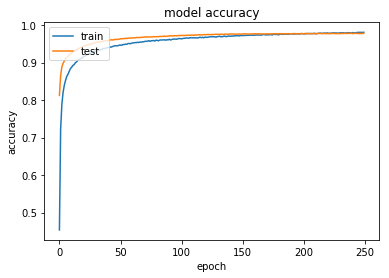

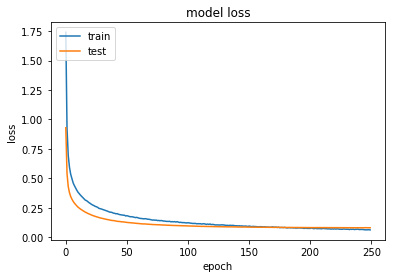

In [41]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Different Optimizers

In [42]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [43]:
np.random.seed(1671)  # for reproducibility

In [44]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer, explainedin this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [45]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [47]:
# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [48]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [49]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()

In [50]:
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

In [51]:
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

In [52]:
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
__________

In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [55]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s - loss: 0.4770 - acc: 0.8576 - val_loss: 0.1848 - val_acc: 0.9454
Epoch 2/20
48000/48000 [==============================] - 2s - loss: 0.2258 - acc: 0.9332 - val_loss: 0.1399 - val_acc: 0.9580
Epoch 3/20
48000/48000 [==============================] - 2s - loss: 0.1756 - acc: 0.9474 - val_loss: 0.1173 - val_acc: 0.9665
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 0.1508 - acc: 0.9555 - val_loss: 0.1159 - val_acc: 0.9667
Epoch 5/20
48000/48000 [==============================] - 2s - loss: 0.1334 - acc: 0.9602 - val_loss: 0.1005 - val_acc: 0.9702
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 0.1218 - acc: 0.9629 - val_loss: 0.0993 - val_acc: 0.9718
Epoch 7/20
48000/48000 [==============================] - 2s - loss: 0.1129 - acc: 0.9666 - val_loss: 0.0963 - val_acc: 0.9722
Epoch 8/20
48000/48000 [==============================] - 2s 

In [56]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9376/10000 [===========================>..] - ETA: 0s
Test score: 0.101696636269
Test accuracy: 0.978


## Checkpointing

In [1]:
from __future__ import division, print_function 
from keras.callbacks import ModelCheckpoint 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout 
from keras.utils import np_utils 
import numpy as np 
import os 

Using TensorFlow backend.


In [2]:
BATCH_SIZE = 128 
NUM_EPOCHS = 20 
MODEL_DIR = "/tmp" 

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data() 
Xtrain = Xtrain.reshape(60000, 784).astype("float32") / 255 
Xtest = Xtest.reshape(10000, 784).astype("float32") / 255 
Ytrain = np_utils.to_categorical(ytrain, 10) 
Ytest = np_utils.to_categorical(ytest, 10) 
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape) 

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [4]:
model = Sequential() 

In [5]:
model.add(Dense(512, input_shape=(784,), activation="relu")) 
model.add(Dropout(0.2))

In [6]:
model.add(Dense(512, activation="relu")) 
model.add(Dropout(0.2)) 

In [7]:
model.add(Dense(10, activation="softmax")) 

In [8]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
              metrics=["accuracy"]) 

In [9]:
# save best model 
checkpoint = ModelCheckpoint( 
    filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5")) 

In [10]:
model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, nb_epoch=NUM_EPOCHS, 
          validation_split=0.1, callbacks=[checkpoint])

/Users/ling/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s - loss: 0.2639 - acc: 0.9193 - val_loss: 0.0987 - val_acc: 0.9698
Epoch 2/20
54000/54000 [==============================] - 10s - loss: 0.1065 - acc: 0.9670 - val_loss: 0.0738 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 9s - loss: 0.0768 - acc: 0.9762 - val_loss: 0.0662 - val_acc: 0.9798
Epoch 4/20
54000/54000 [==============================] - 8s - loss: 0.0604 - acc: 0.9815 - val_loss: 0.0769 - val_acc: 0.9793
Epoch 5/20
54000/54000 [==============================] - 8s - loss: 0.0506 - acc: 0.9844 - val_loss: 0.0747 - val_acc: 0.9803
Epoch 6/20
54000/54000 [==============================] - 9s - loss: 0.0428 - acc: 0.9873 - val_loss: 0.0775 - val_acc: 0.9823
Epoch 7/20
54000/54000 [==============================] - 9s - loss: 0.0388 - acc: 0.9883 - val_loss: 0.0756 - val_acc: 0.9840
Epoch 8/20
54000/54000 [==============================] - 9s 